# Data is for Good : Concours sur la Smart City
Optimisation des tournées pour l'entretien des arbres de la ville de Paris

## 1. Installation de l'environnement virtuel et des librairies

### A. Environnement virtuel 

La liste de dépendances avec la version se trouve dans le fichier ```requirements.txt```.

Pour installer les dépendances nécessaires (Windows): 

1. Se rendre dans le répertoire du projet
2. Créer l'environnement virtuel via ```python -m venv environnement/```
3. Activer l'environnement virtuel via ```.\environnement\Scripts\activate```
4. Installer les dépendances via ```pip install -r requirements.txt```
5. Exporter les dépendances via ```pip freeze > requirements.txt```

Desactivez l'environnement virtuel avec la commande ```deactivate```

### B. Librairies

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

## 2. Présentation générale du jeu de données

### A. Importation des données

In [3]:
df = pd.read_csv('p2-arbres-fr.csv', sep=';')
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [4]:
df.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [5]:
df["type_emplacement"].unique()

array(['Arbre'], dtype=object)

In [6]:
df.shape

(200137, 18)

Notre jeu de données contient 200137 lignes (200136 arbres) et 18 colonnes ou variables : 

* ```id``` : l'ID unique de l'arbre
* ```type_emplacement``` : tous les individus de cette variable ont la même valeur, "Arbre", nous ne pouvons pas exploiter ce variable
* ```domanialite``` : la domanialité d'un arbre, jardin, alignement, cimetière, etc.
* ```arrondissement``` 
* ```complement_adresse``` 
* ```numero``` : NaN sur toute la colonne, variable à supprimer
* ```lieu``` : l'adresse de chaque arbre
* ```id_emplacement``` 
* ```libelle_francais``` : ex. Marronnier, Arbre à Miel, Tilleul, etc.
* ```genre``` : ex. Aesculus, Tetradium, Platanus, etc.
* ```espece``` : l'espèce de l'arbre
* ```variete``` : la variété de l'arbre
* ```circonference_cm``` : la circonférence de l'arbre en centimètres
* ```hauteur_m``` : l'hauteur de l'arbre en mètres
* ```stade_developpement``` : le stade de développement (jeune, jeune adulte, adulte, mature)
* ```remarquable``` : si l'arbre est rémarquable ou pas
* ```geo_point_2d_a, geo_point_2d_b``` : les coordonées géographiques de l'arbre

### B. Erreurs de type

In [7]:
df.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [8]:
df["remarquable"].unique()

array([ 0., nan,  1.])

Les types de variable sont ceux qui sont attendus. Il y a des variables numériques et non-numériques (object: texte).  
La variable ```remarquable``` pourrait être un float, à la place nous avons soit 1.0 pour vrai et 0.0 pour faux, ainsi que quelques valeurs NaN.

### C. Valeurs aberrantes/atypiques

#### Hauteur

D'après le site du Ministère de l'Agriculture, l'arbre le plus haut de Paris mésure 30m de haut. Mais, dans notre jeu de données, il existe 558 arbres à Paris dont l'hauteur dépasse 30m, dont la valeur la plus aberrante est l'arbre avec une hauteur de 800000m.  
La proposition est de remplacer simplement les valeurs atypiques et aberrantes par la médiane.

Text(0.5, 0, 'Hauteur en mètres')

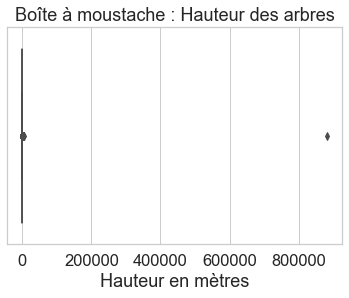

In [9]:
hauteur_boxplot = sns.boxplot(x=df['hauteur_m'])
hauteur_boxplot.set_title("Boîte à moustache : Hauteur des arbres")
hauteur_boxplot.set_xlabel("Hauteur en mètres")

In [10]:
df_clean = df

df_mask = df_clean['hauteur_m']>31
filtered_df = df_clean[df_mask].count()
print(filtered_df["id"])

558


In [11]:
median_h_sd = df_clean.groupby('stade_developpement')["hauteur_m"].median().sort_values(ascending=True)
hauteur_median = df_clean["hauteur_m"].median()
print(median_h_sd[0],median_h_sd[1],median_h_sd[2], median_h_sd[3])

5.0 9.0 12.0 20.0


In [12]:
df_clean["hauteur_m"] = np.where(
    (df_clean["hauteur_m"] > 31) & (df_clean["stade_developpement"]=="J"), median_h_sd[0], df_clean["hauteur_m"]
)

df_clean["hauteur_m"] = np.where(
    (df_clean["hauteur_m"] > 31) & (df_clean["stade_developpement"]=="JA"), median_h_sd[1], df_clean["hauteur_m"]
)

df_clean["hauteur_m"] = np.where(
    (df_clean["hauteur_m"] > 31) & (df_clean["stade_developpement"]=="A"), median_h_sd[2], df_clean["hauteur_m"]
)

df_clean["hauteur_m"] = np.where(
    (df_clean["hauteur_m"] > 31) & (df_clean["stade_developpement"]=="M"), median_h_sd[3], df_clean["hauteur_m"]
)

df_clean["hauteur_m"] = np.where(
    (df_clean["hauteur_m"] > 31) & (df_clean["stade_developpement"].isnull()), hauteur_median, df_clean["hauteur_m"]
)

Text(0.5, 0, 'Hauteur en mètres')

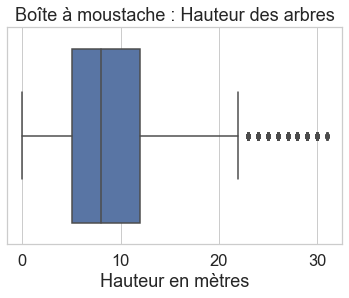

In [13]:

hauteur_boxplot = sns.boxplot(x=df_clean['hauteur_m'])
hauteur_boxplot.set_title("Boîte à moustache : Hauteur des arbres")
hauteur_boxplot.set_xlabel("Hauteur en mètres")


#### Circonférence

La circonférence du plus grand arbre de Paris est de 800cm. Nous pouvons donc procéder de la même manière qu'avec la variable ```hauteur_m``` en nettoyant toutes les valeurs qui dépassent par ex. 810cm.

Text(0.5, 0, 'Circonférence en centimètres')

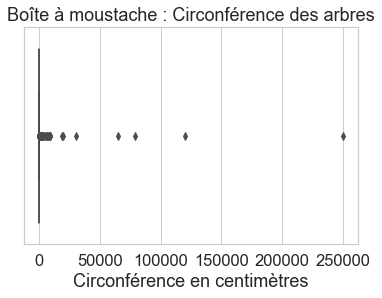

In [14]:
circonference_boxplot = sns.boxplot(x=df_clean['circonference_cm'])
circonference_boxplot.set_title("Boîte à moustache : Circonférence des arbres")
circonference_boxplot.set_xlabel("Circonférence en centimètres")

In [15]:
df_mask = df_clean['circonference_cm']>810
filtered_df = df[df_mask].count()
print(filtered_df["id"])

77


In [16]:
median_c_sd = df_clean.groupby('stade_developpement')["circonference_cm"].median().sort_values(ascending=True)
circ_median = df_clean["circonference_cm"].median()
print(median_c_sd[0],median_c_sd[1],median_c_sd[2], median_c_sd[3])

35.0 65.0 115.0 215.0


In [17]:
df_clean["circonference_cm"] = np.where(
    (df_clean["circonference_cm"] > 810) & (df_clean["stade_developpement"]=="J"), median_c_sd[0], df_clean["circonference_cm"]
)

df_clean["circonference_cm"] = np.where(
    (df_clean["circonference_cm"] > 810) & (df_clean["stade_developpement"]=="JA"), median_c_sd[1], df_clean["circonference_cm"]
)

df_clean["circonference_cm"] = np.where(
    (df_clean["circonference_cm"] > 810) & (df_clean["stade_developpement"]=="A"), median_c_sd[2], df_clean["circonference_cm"]
)

df_clean["circonference_cm"] = np.where(
    (df_clean["circonference_cm"] > 810) & (df_clean["stade_developpement"]=="M"), median_c_sd[3], df_clean["circonference_cm"]
)

df_clean["circonference_cm"] = np.where(
    (df_clean["circonference_cm"] > 810) & (df_clean["stade_developpement"].isnull()), circ_median, df_clean["circonference_cm"]
)

Text(0.5, 0, 'Circonférence en centimètres')

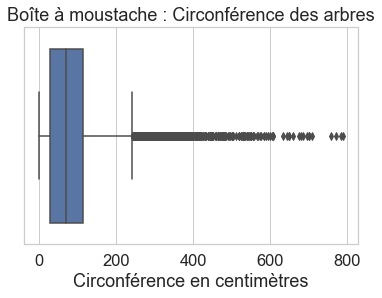

In [18]:
circonference_boxplot = sns.boxplot(x=df_clean['circonference_cm'])
circonference_boxplot.set_title("Boîte à moustache : Circonférence des arbres")
circonference_boxplot.set_xlabel("Circonférence en centimètres")

#### hauteur_m = 0, circonference_cm = 0

Il y a 25501 arbres dans notre jeu de données dont l'hauteur est 0m et la circonférence est 0cm. Si le stade de développement est renseigné, nous pouvons éstimer l'hauteur et la circonférence de l'arbre grâce aux moyennes de chaque groupe (jeune, adulte, etc.).

In [19]:
df_c_h_0 = df_clean[(df_clean["hauteur_m"]==0) & (df_clean["circonference_cm"]==0)]
df_c_h_0["id"].count()

25501

In [20]:
print(df_c_h_0.groupby("stade_developpement").size())

stade_developpement
A      56
J     122
JA     37
M      22
dtype: int64


<AxesSubplot:>

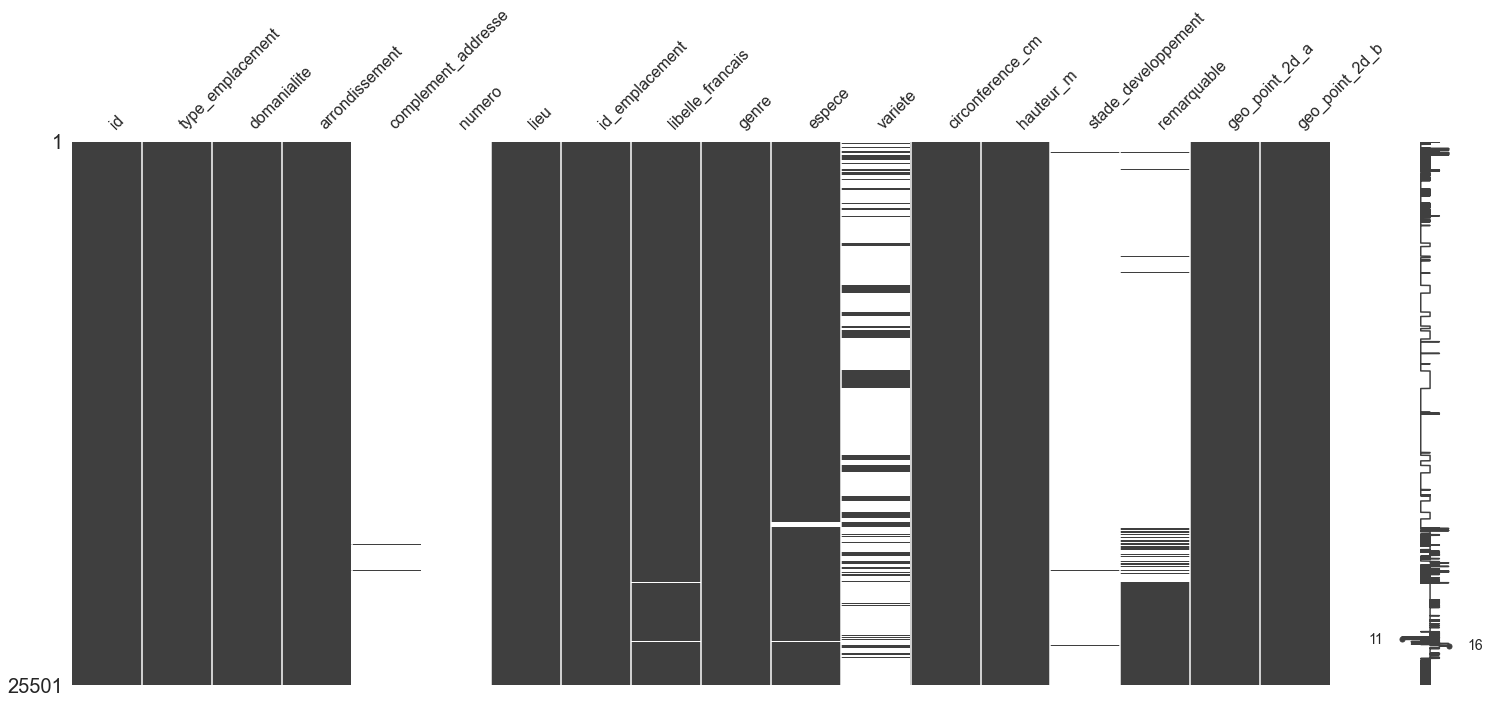

In [21]:
missingno.matrix(df_c_h_0)

Malheureusement, il manque trop de données pour essayer de renseigner les valeurs manquantes. Les arbres de hauteur et circonférence 0 corréspondent aux environ 20000 arbres plantés à Paris cet hiver dans le cadre de l'objectif Plan Arbre detaillé sur le site de la ville de Paris.  
Il faudra remplacer les valeurs anormales (0) par NaN afin que ces valeurs n'influencent pas l'analyse.

In [22]:
df_clean["hauteur_m"] = np.where(
    (df_clean["hauteur_m"]==0), np.nan, df_clean["hauteur_m"]
)
df_clean["circonference_cm"] = np.where(
    (df_clean["circonference_cm"]==0), np.nan, df_clean["circonference_cm"]
)

### D. Valeurs manquantes

<AxesSubplot:>

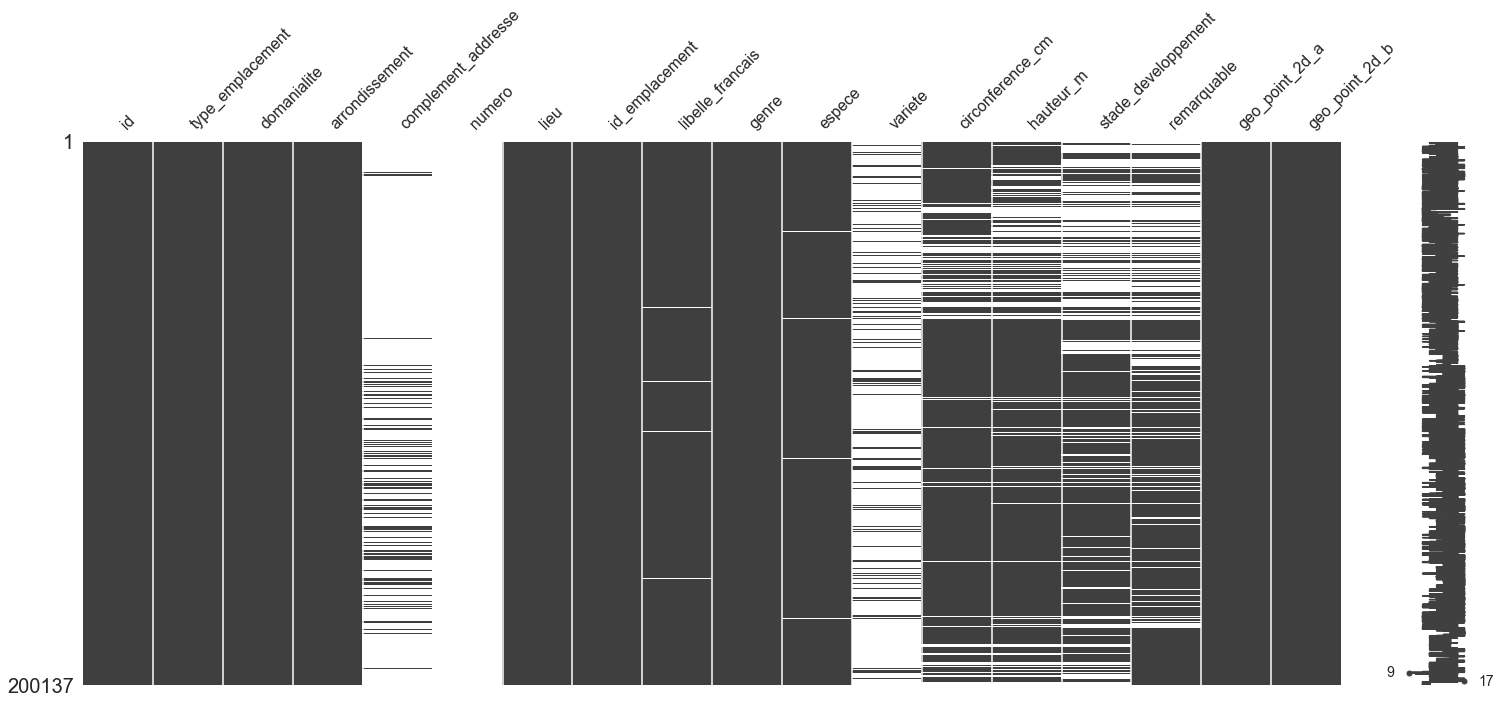

In [23]:
missingno.matrix(df_clean)

<AxesSubplot:>

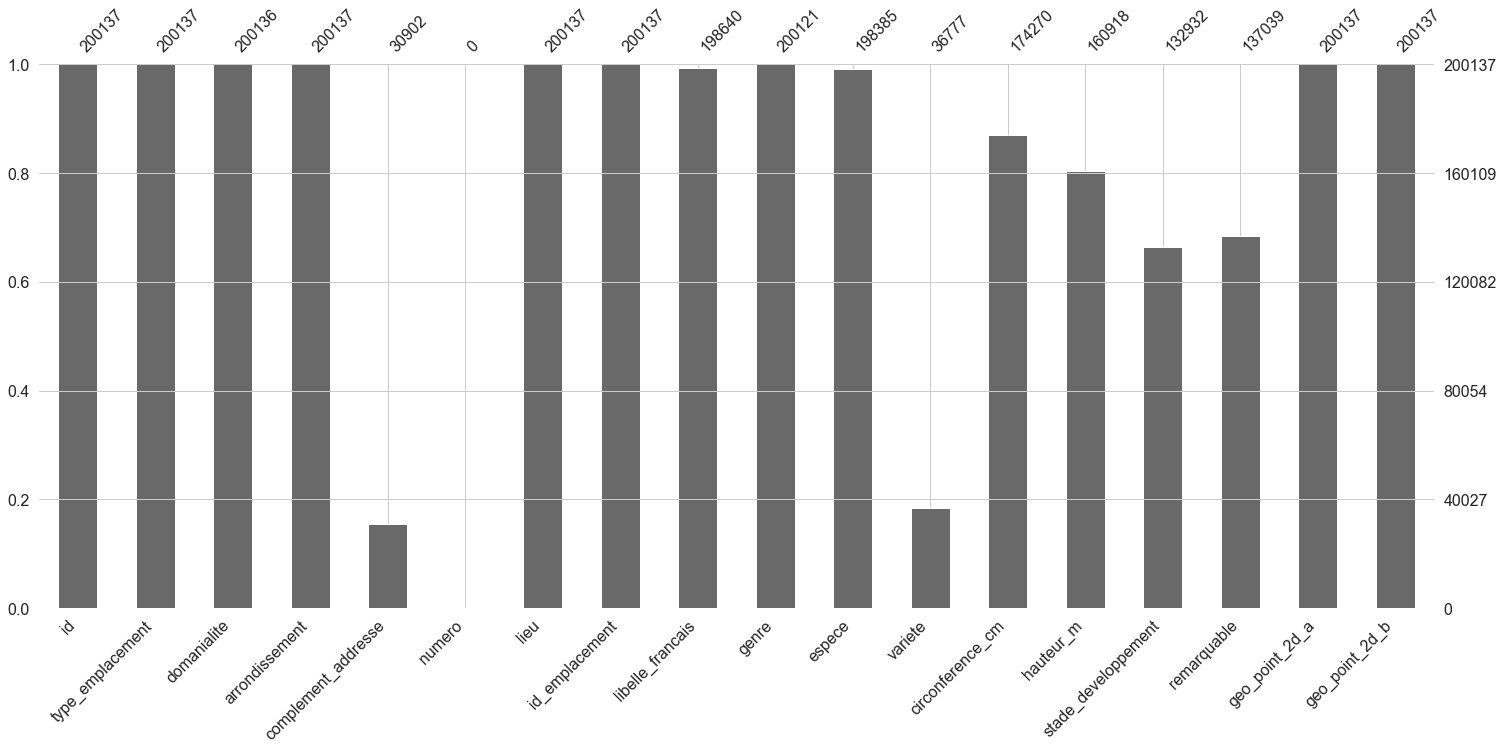

In [24]:
missingno.bar(df_clean)

In [25]:
df.isna().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm        25867
hauteur_m               39219
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

Sur 200137 individus (arbres), il nous manque : 
* Le complément d'adresse pour 169235 individus. Ce n'est pas grave, pas toutes les adresses contiennent un complément. 
* Le numéro pour 200137 individus. Cette donnée n'est pas essentielle à notre analyse et nous pouvons supprimer ce variable car il manque pour tous les individus.
* Le libellé français sur 1497 individus, l'espèce sur 1752 individus et la variété sur 163360 individus. Nous pourrons utiliser le genre et le libellé français pour nos analyses puisque c'est le variable pour lequel il manque le moins de données. 
* Le stade de développement manque pour 67205 individus : nous pouvons extrapoler cette donnée grâce à la hauteur et la circonférence de l'arbre. 
* Le variable rémarquable manque pour 63098 individus : environ 200 arbres rémarquables à paris. Nous pouvons supposer que les 63k ne sont pas remarquables et remplacer ainsi les valeurs manquantes.

#### Nettoyage des valeurs manquantes

##### Elimination de la colonne "numero" 

Puisqu'il n'y a pas de valeurs pour le variable "numero", cette variable peut être supprimée. Nous ne pouvons pas en servir pour l'analyse.  


In [26]:
df_clean = df.drop("numero",axis=1) # j'elimine la colonne "numero", le dataframe nettoyé sous le variable #df_clean
df_clean.shape #je vérifie qu'il y a maintenant 17 colonnes au lieu de 18

(200137, 17)

##### Nettoyage du variable "remarquable"
Il faut remplacer les valeurs manquantes par 0.0, ce qui corréspond à "arbre non-remarquable". Nous pouvons supposer que toutes les arbres remarquables ont été marqués avec un 1.0 dans le dataframe.

In [27]:
df.loc[df['remarquable']==1.0]["id"].shape  # il y a 184 arbres remarquables dans notre dataframe
                                            # ce qui correspond à notre information d'environ
                                            # 200 arbres remarquables à Paris


(184,)

In [28]:
df_clean["remarquable"] = df_clean["remarquable"].fillna(0.0) # remplacer NaN par 0.0 pour variable "remarquable"
df_na_remarquable = df_clean["remarquable"].isnull().sum() 
print(df_na_remarquable) # vérifier qu'il n'y a plus de valeur manquante pour le var "remarquable"

0


In [29]:
df_clean["remarquable"].unique() # vérifier qu'il n'y a pas d'erreur d'irregularité ou lexicale

array([0., 1.])

##### Nettoyage de la variable "stade_developpement"

<AxesSubplot:xlabel='hauteur_m', ylabel='circonference_cm'>

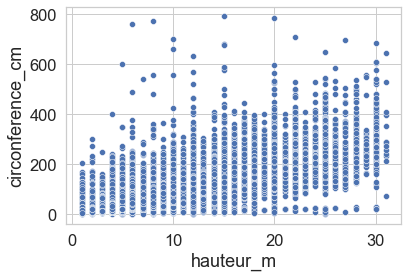

In [30]:
sns.scatterplot(x=df_clean["hauteur_m"], y=df_clean["circonference_cm"])

Pour éviter de perdre 67205 valeurs dans la variable ```stade_developpement```, puisqu'il y a une rélation linéaire entre l'hauteur et la circonférence, nous pouvons éstimer le stade de développement à l'aide d'un des deux variables.  
  
Cette estimation n'est pas complétement exacte car chaque espèce d'arbre est unique et a des caractéristiques différentes. Nous avons la possibilité d'obtenir une valeur plus exacte en étudiant la corrélation entre stade_developpement, hauteur_m, circonference_cm et espèce si un jour une estimation plus exacte nous interesserait. 

<AxesSubplot:xlabel='stade_developpement', ylabel='hauteur_m'>

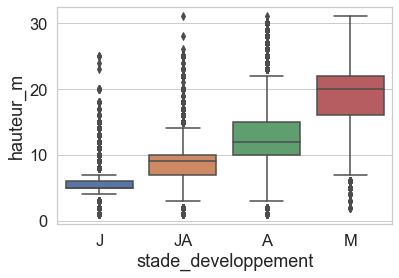

In [31]:
sorted_nb = df_clean.groupby(["stade_developpement"])["hauteur_m"].median().sort_values()
sns.boxplot(x=df_clean["stade_developpement"], y=df_clean["hauteur_m"], order=list(sorted_nb.index))

In [32]:
df_clean[df_clean["stade_developpement"] == "J"].describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.693700e+04,26811.000000,26463.000000,26937.000000,26937.000000,26937.000000
mean,5.551973e+05,38.687069,5.758304,0.000037,48.851984,2.353568
std,6.932945e+05,18.856549,2.064508,0.006093,0.024666,0.051922
min,9.988400e+04,1.000000,1.000000,0.000000,48.759069,2.212541
25%,2.067940e+05,25.000000,5.000000,0.000000,48.833242,2.315492
50%,2.402390e+05,35.000000,5.000000,0.000000,48.847313,2.349694
75%,2.914600e+05,45.000000,6.000000,0.000000,48.869577,2.390117
max,2.023252e+06,355.000000,25.000000,1.000000,48.910713,2.469759


In [33]:
df_clean[df_clean["stade_developpement"] == "JA"].describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,3.544400e+04,35393.000000,34867.000000,35444.000000,35444.000000,35444.000000
mean,3.634049e+05,70.353827,9.055210,0.000028,48.854241,2.344254
std,4.689381e+05,28.315324,3.212429,0.005312,0.023929,0.047973
min,1.005450e+05,4.000000,1.000000,0.000000,48.742290,2.212229
25%,2.092888e+05,52.000000,7.000000,0.000000,48.836690,2.306372
50%,2.421920e+05,65.000000,9.000000,0.000000,48.853149,2.345472
75%,2.777322e+05,85.000000,10.000000,0.000000,48.870452,2.379510
max,2.023255e+06,790.000000,31.000000,1.000000,48.910689,2.469718


In [34]:
df_clean[df_clean["stade_developpement"] == "A"].describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,6.443800e+04,64357.000000,63247.000000,64438.000000,64438.000000,64438.000000
mean,3.615459e+05,122.293364,13.102724,0.000838,48.857050,2.344232
std,4.728249e+05,45.758258,4.443423,0.028937,0.024753,0.049452
min,9.987500e+04,1.000000,1.000000,0.000000,48.742371,2.211330
25%,1.992020e+05,90.000000,10.000000,0.000000,48.840100,2.304552
50%,2.477445e+05,115.000000,12.000000,0.000000,48.857773,2.345074
75%,2.798838e+05,150.000000,15.000000,0.000000,48.873826,2.383144
max,2.023308e+06,759.000000,31.000000,1.000000,48.911050,2.469752


In [35]:
df_clean[df_clean["stade_developpement"] == "M"].describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,6.113000e+03,6090.000000,6088.000000,6113.000000,6113.000000,6113.000000
mean,3.053251e+05,219.183744,19.128285,0.020612,48.858447,2.345505
std,4.004398e+05,63.617007,4.870574,0.142092,0.035401,0.046124
min,1.000320e+05,3.000000,2.000000,0.000000,48.742421,2.211263
25%,1.505620e+05,190.000000,16.000000,0.000000,48.835919,2.314240
50%,2.271530e+05,215.000000,20.000000,0.000000,48.863210,2.349780
75%,2.729820e+05,245.000000,22.000000,0.000000,48.886557,2.374434
max,2.023015e+06,784.000000,31.000000,1.000000,48.911003,2.465116


On peut observer que : 
* Un jeune arbre est généralement entre 5 et 6m de haut
* Un jeune adulte entre 7 et 10m
* Un arbre adulte entre 10 et 15m
* Un arbre mature entre 16 et 22m

In [36]:
df_clean.loc[
    (df_clean["stade_developpement"].isnull()) & 
    (df_clean["hauteur_m"]< 7), "stade_developpement"] = "J"

In [37]:
df_clean.loc[
    (df_clean["stade_developpement"].isnull()) & 
    ((df_clean["hauteur_m"]>= 7)&(df_clean["hauteur_m"]< 10.5)), "stade_developpement"] = "JA"

In [38]:
df_clean.loc[
    (df_clean["stade_developpement"].isnull()) & 
    ((df_clean["hauteur_m"]>= 10.5)&(df_clean["hauteur_m"]<= 15)), "stade_developpement"] = "A"

In [39]:
df_clean.loc[
    (df_clean["stade_developpement"].isnull()) & 
    ((df_clean["hauteur_m"]> 15)), "stade_developpement"] = "M"

In [40]:
df_na_sd = df_clean["hauteur_m"].isnull()
print(df_na_sd.sum())

39219


Pour les arbres dont l'hauteur et la circonférence n'ont pas été renseignés (hauteur = 0, circonference = 0, qui ont été convertis en NaN), il nous sera impossible d'estimer le stade de développement.

### E. Doublons

In [41]:
duplicated = df[df.duplicated(['geo_point_2d_a','geo_point_2d_b'], keep=False)].sort_values(by="geo_point_2d_a")
duplicated

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
185480,2006188,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402030,Tilleul,Tilia,platyphyllos,NaN,NaN,NaN,NaN,0.0,48.829912,2.439665
185479,2006187,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402029,Tilleul,Tilia,platyphyllos,NaN,NaN,NaN,NaN,0.0,48.829912,2.439665
189134,2011523,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,Italica',100.0,22.0,A,0.0,48.836416,2.446277
189133,2011522,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,NaN,NaN,NaN,NaN,0.0,48.836416,2.446277
193577,2016369,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210035,Pommier à fleurs,Malus,trilobata,NaN,NaN,NaN,NaN,0.0,48.836862,2.446518
188329,2010634,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210034,Hêtre,Fagus,sylvatica,Rotundifolia',75.0,8.0,JA,0.0,48.836862,2.446518
10099,112286,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,5,Ailante,Ailanthus,altissima,NaN,NaN,NaN,NaN,NaN,48.838318,2.406610
10100,112287,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,NaN,NaN,NaN,NaN,NaN,48.838318,2.406610
188427,2010732,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20069,Cèdre,Cedrus,libani subsp. atlantica,NaN,110.0,18.0,A,0.0,48.838539,2.439350
193587,2016379,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20129,Cèdre,Cedrus,libani subsp. atlantica,NaN,NaN,NaN,NaN,0.0,48.838539,2.439350


In [42]:
duplicated.shape

(22, 18)

Il y a 22 arbres qui partagent coordonnées géographiques avec un autre arbre. La plupart de ces arbres se trouvent dans le Bois de Vincennes, qui est un quartier très boisé. Puisqu'il ne s'agit pas de beaucoup d'individus (22 sur 200 000 arbres), j'ai decidé de ne pas modifier le jeu de données.  
  
S'il y avait beaucoup d'individus qui partagéaient des coordonées géographiques, j'aurais fait une recherche plus profonde, examiné les ```id_emplacement```, regardé dans Google Maps Street View pour essayer de comprendre et j'aurais peut-être gardé que les individus avec le maximum de valeurs renseignés.

## 3. Démarche méthodologique d'analyse de données 

### A. Variables quantitatives

In [43]:
var_quant = ["hauteur_m", "circonference_cm", "remarquable"]
df_clean[[col for col in var_quant]].describe()

,hauteur_m,circonference_cm,remarquable
count,160918.000000,174270.000000,200137.000000
mean,10.347761,91.470913,0.000919
std,5.114521,58.956751,0.030307
min,1.000000,1.000000,0.000000
25%,6.000000,45.000000,0.000000
50%,10.000000,80.000000,0.000000
75%,14.000000,122.000000,0.000000
max,31.000000,790.000000,1.000000


#### Variables quantitatives continues (hauteur & circonférence)

Text(0.5, 1.0, 'Hauteur des arbres')

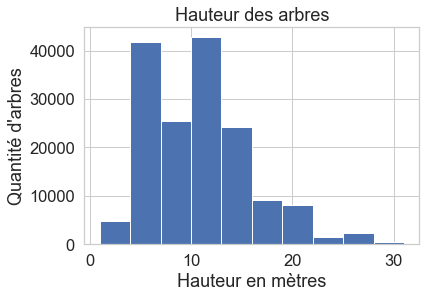

In [44]:
df_circ = df_clean.circonference_cm
df_hauteur = df_clean.hauteur_m

df_hauteur.hist(bins=10)
plt.xlabel("Hauteur en mètres")
plt.ylabel("Quantité d'arbres")
plt.title("Hauteur des arbres")

Text(0.5, 1.0, 'Circonférence des arbres')

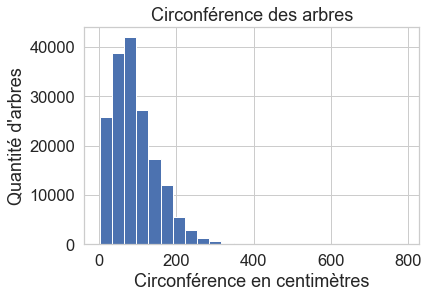

In [45]:
df_circ.hist(bins=25)
plt.xlabel("Circonférence en centimètres")
plt.ylabel("Quantité d'arbres")
plt.title("Circonférence des arbres")

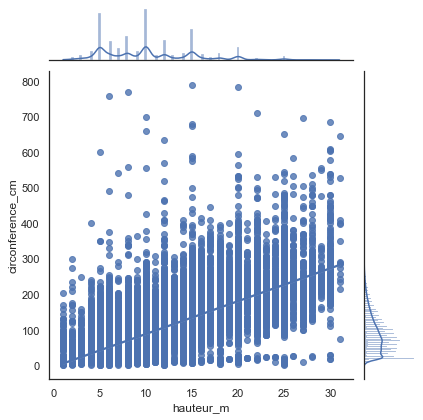

In [46]:
sns.set()

with sns.axes_style("white"):
    sns.jointplot(x = "hauteur_m", y = "circonference_cm", data=df_clean, kind="reg")

#### Variables quantitatives discrètes (arbres remarquables)

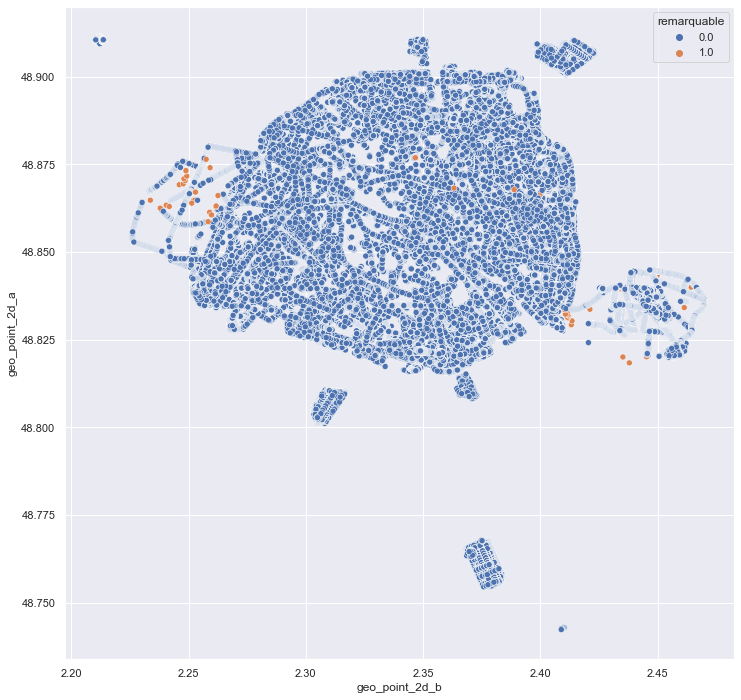

In [47]:
fig = plt.figure(figsize=(12,12))
ax = sns.scatterplot(data=df_clean,
                x="geo_point_2d_b",
                y="geo_point_2d_a",
                hue='remarquable'
                )

### B. Variables qualitatives

In [48]:
var_qual = ["domanialite", "arrondissement", "libelle_francais", "stade_developpement"]
df_clean[[col for col in var_qual]].describe()

,domanialite,arrondissement,libelle_francais,stade_developpement
count,200136,200137,198640,163185
unique,9,25,192,4
top,Alignement,PARIS 15E ARRDT,Platane,A
freq,104949,17151,42508,69035


#### Variables qualitiatives ordinales (stade de développement)

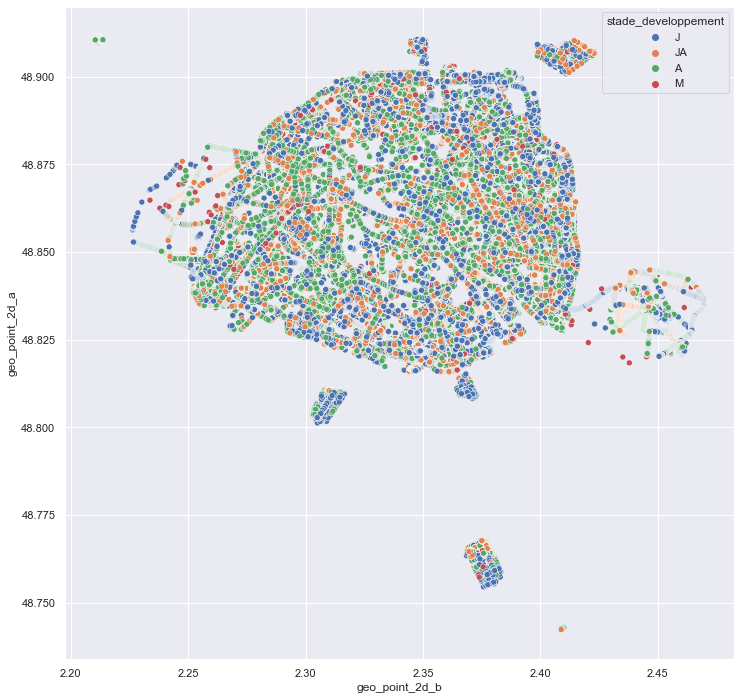

In [49]:
fig = plt.figure(figsize=(12,12))
ax = sns.scatterplot(data=df_clean,
                x="geo_point_2d_b",
                y="geo_point_2d_a",
                hue='stade_developpement',
                hue_order=['J', 'JA', 'A', 'M'])

<function matplotlib.pyplot.show(close=None, block=None)>

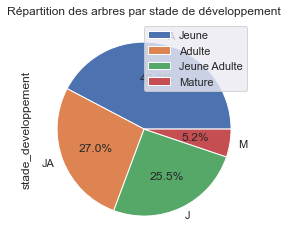

In [50]:
df_clean.stade_developpement.value_counts().plot.pie(autopct='%1.1f%%')

plt.legend(labels=["Jeune", "Adulte", "Jeune Adulte", "Mature"])
plt.title("Répartition des arbres par stade de développement")
plt.show

#### Variables qualitatives nominales (arondissement, libellé français, type de l'emplacement)

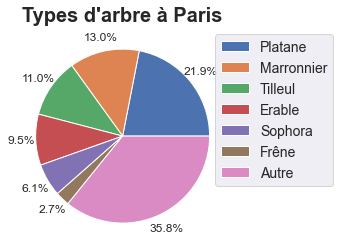

<Figure size 1440x1440 with 0 Axes>

In [51]:
df_lf = df_clean.groupby(["libelle_francais"])["id"].count().sort_values(ascending=False).to_frame(name="quantite").reset_index()
autres=df_lf[7:]["quantite"].sum()
df_lf = df_lf[:7]

new_row = {'autres':autres}
df_lf["libelle_francais"][6] = 'Autre'
df_lf["quantite"][6] = autres

count = df_lf["quantite"]
lf = df_lf["libelle_francais"]

pie = plt.pie(count, autopct='%.1f%%',pctdistance=1.17)
plt.legend(labels=lf, bbox_to_anchor =(1, 0, 0.5, 1), fontsize=14)
plt.title("Types d'arbre à Paris", loc='center',fontsize="20", fontweight='bold')
plt.figure(figsize=(20,20))

plt.show()

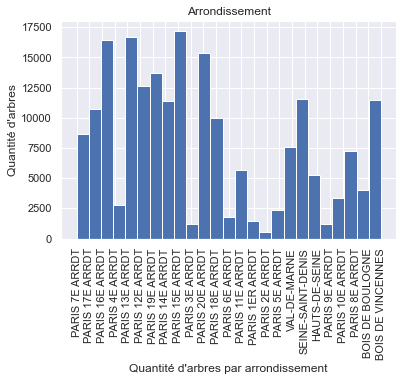

In [52]:
df_clean["arrondissement"].hist(bins=25)
plt.xlabel("Quantité d'arbres par arrondissement")
plt.ylabel("Quantité d'arbres")
plt.title("Arrondissement")
plt.xticks(rotation='vertical')
plt.show()

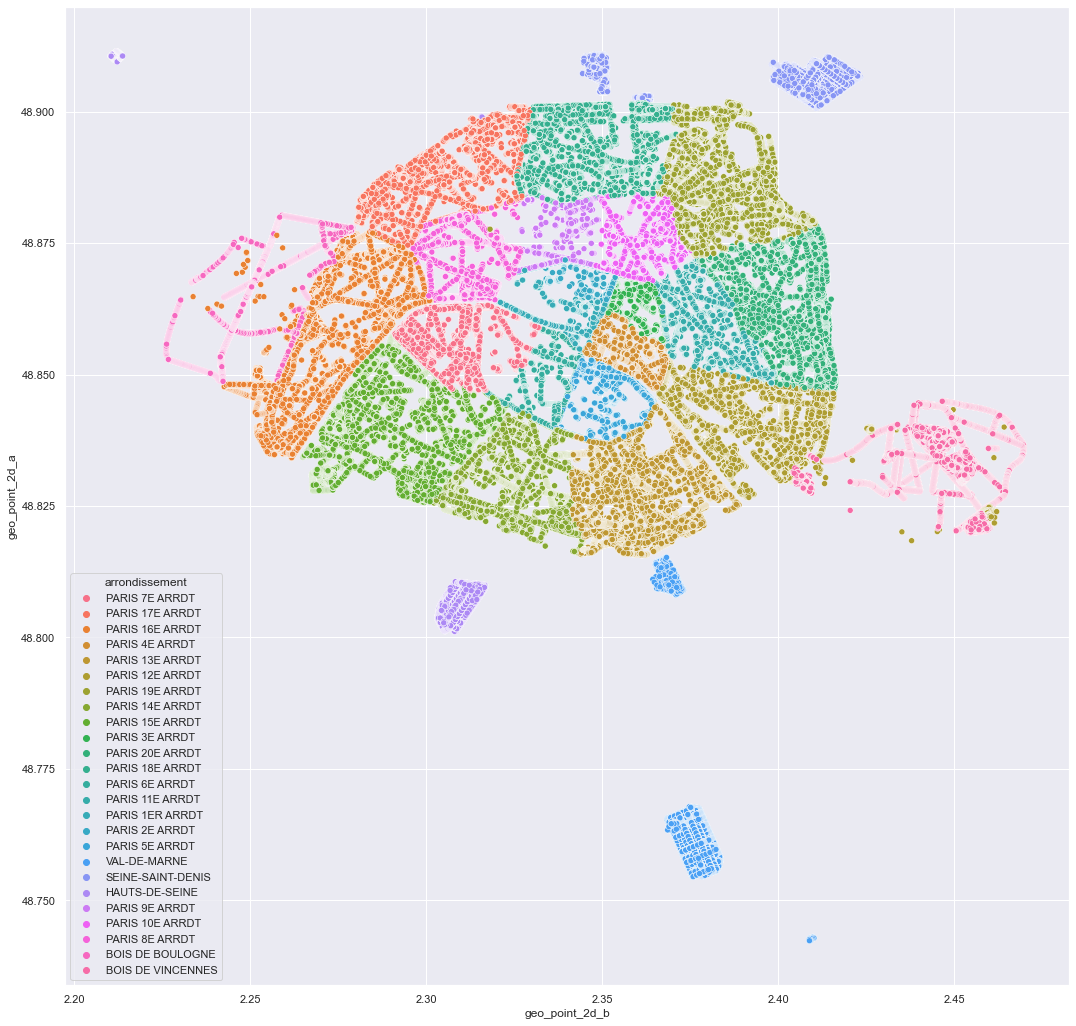

In [53]:
fig = plt.figure(figsize=(18,18))
ax = sns.scatterplot(data=df_clean,
                x="geo_point_2d_b",
                y="geo_point_2d_a",
                hue='arrondissement')

## 4. Synthèse de l'analyse de données

Le jeu de données proposé est assez bien renseigné et peut être utilisé pour optimiser les tournées d'entretien des arbres à Paris.  

Les variables quantitatives, l'hauteur et la circonférence, peuvent par exemple être utilisés pour : 
* Organiser les tournées d'entretien en fonction de la taille de l'arbre : faut-il déplacer l'arbre bientôt en fonction de son emplacement/proximité à un bâtiment/proximité aux autres arbres de grande taille ? 
* Les dimensions de l'arbre peuvent également être utiles en combinaison avec le stade de développement d'un arbre. Si un arbre adulte est de pétite taille, y-a-t'il une maladie en cause ? Peut-être qu'il faudra prévoir un entretien particulier pour les arbres malades ? 
* Ceci est un exemple, mais les variables quantitatives sont très utiles si on les analyse ensemble avec les variables qualitatives dans une analyse bivariée. Ces valeurs sont également précieux afin d'imputer des valeurs manquantes, par exemple pour éstimer un stade de développement qui manque. 
* Les coordonnées géographiques sont évidemment essentiels pour planifier les tournées dans la ville de Paris. Cette variable, en combinaison avec les autres variables (en particuler les variables qualitatives comme stade de développement ou espèce), peut aider à tracer une tournée d'entretien. Les coordonnées géographiques sont également utiles car les arbres plantés sur les routes peuvent être endommagés par les vibrations de la route, par le passage des piétons, par la pollution, par le manque de terrain, tandis que les arbres qui poussent dans des emplacements plus verts ou boisés sont moins dérangés.
  
Les variables qualitatives :
* L'espèce (dans notre analyse, le libellé français) peut être utile à savoir quels arbres ont besoin d'un entretien spécifique. Il y a certainement des espèces qui ont un entretien particuler et des autres espèces qui n'ont pas besoin de soin particulier.
* Le stade de développement d'un arbre peut aider à planifier l'arrossage par exemple, si les jeunes arbres ont besoin de plus d'eau, ou l'envers ? Ou peut-être des soins particuliers à certains âges ?
* L'arrondissement nous aide à comprendre quels quartiers ont plus d'arbres, et quels quartiers peuvent peut-être bénéficier des prochaines plantatations afin de les rendre plus verts. 
* La domanialité (jardin, alignement, etc.) est également utile à catégoriser les arbres selon les soins. Peut-être un arbre de jardin a moins besoin d'élagage que les arbres d'alignement.
  
Conseils : 
* Être méticuleux dans la saisie des données pour éviter d'avoir beaucoup de données aberrantes. Les données aberrantes modifient les résultats d'un analyse et nécessitent beaucoup de temps de nettoyage. 
* Remplir l'hauteur, la circonférence et le stade de développement d'un arbre dès plantation pour que les nouveaux arbres puissent être compris dans l'analyse. 